# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
os.getcwd()

'C:\\Users\\13147\\Resources\\Python-APIs-HW'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []
i =1
for city in cities:
    city = city
    query_url = f"{url}appid={weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|provideniya
Processing record 2|opuwo
Processing record 3|aklavik
Processing record 4|chuy
Processing record 5|sinnamary
Processing record 6|iguape
Processing record 7|henties bay
Processing record 8|clyde river
Processing record 9|kamenka
Processing record 10|saskylakh
Processing record 11|kaitangata
Processing record 12|saint george
City not found. skipping.
Processing record 13|tiznit
Processing record 14|dikson
Processing record 15|verkhnyaya inta
Processing record 16|comodoro rivadavia
Processing record 17|mahibadhoo
Processing record 18|rikitea
Processing record 19|wad rawah
Processing record 20|jamestown
Processing record 21|masaurhi
Processing record 22|ushuaia
Processing record 23|qaanaaq
Processing record 24|carnarvon
Processing record 25|busselton
Processing record 26|sept-iles
Processing record 27|hermanus
Processing record 28|ambilobe
Processing record 29|bluff
Processing record 30|hasaki
Processing record 31|cockburn town
Processing record 32|puerto ay

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed})

In [6]:
city_df = city_df.rename_axis('City ID')
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Provideniya,99,RU,1624559284,59,64.3833,-173.3000,56.79,7.49
1,Opuwo,0,NA,1624559284,30,-18.0607,13.8400,65.21,7.31
2,Aklavik,40,CA,1624559285,72,68.2191,-135.0107,79.63,6.91
3,Chui,100,UY,1624559285,95,-33.6971,-53.4616,58.24,14.83
4,Sinnamary,62,GF,1624559286,67,5.3833,-52.9500,83.44,2.73
...,...,...,...,...,...,...,...,...,...
542,Yepifan',15,RU,1624559459,73,53.8253,38.5518,75.29,5.70
543,Ginir,99,ET,1624559460,76,7.1333,40.7000,57.24,6.44
544,Taoudenni,3,ML,1624559460,6,22.6783,-3.9836,109.27,7.74


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_df[city_df.Humidity > 99]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
32,Sadao,75,TH,1624559295,100,6.6388,100.4234,78.80,2.01
145,Alice Springs,1,AU,1624559329,100,-23.7000,133.8833,40.55,3.44
176,La Asuncion,50,VE,1624559344,100,11.0333,-63.8628,74.93,13.80
335,Kiryat Gat,0,IL,1624559342,100,31.6100,34.7642,78.82,5.75
497,Mount Gambier,90,AU,1624559445,100,-37.8333,140.7667,48.11,5.75


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

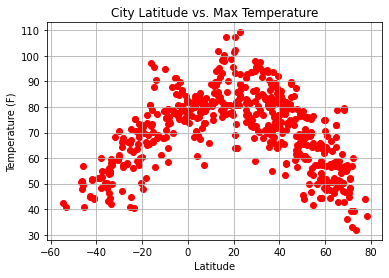

In [9]:
plt.scatter(city_df['Lat'],city_df['Max Temp'], marker = 'o', color= "red")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

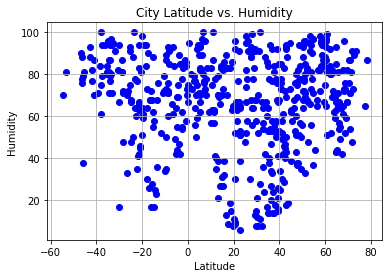

In [10]:
plt.scatter(city_df['Lat'],city_df['Humidity'], marker = 'o', color= "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

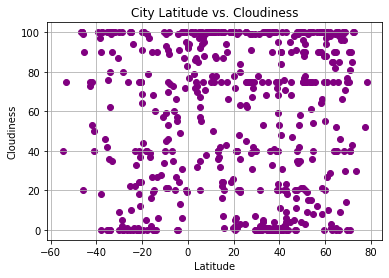

In [11]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'], marker = 'o', color= "purple")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

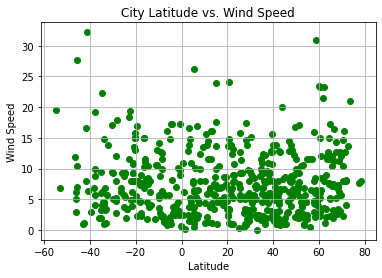

In [12]:
plt.scatter(city_df['Lat'],city_df['Wind Speed'], marker = 'o', color= "green")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

## Linear Regression

In [13]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6805922979919425


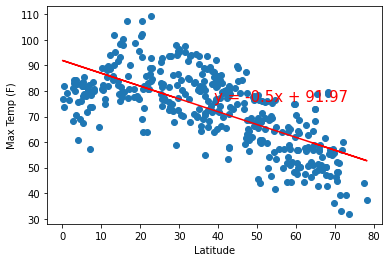

None


In [15]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8092570577506136


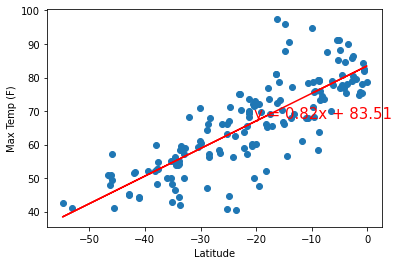

None


In [16]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1159033895873169


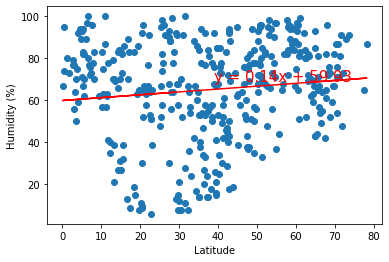

None


In [17]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.257040413704811


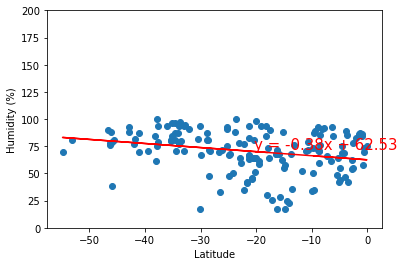

None


In [18]:

x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.048696291425196984


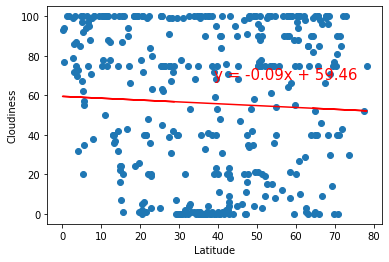

None


In [19]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07957382269416878


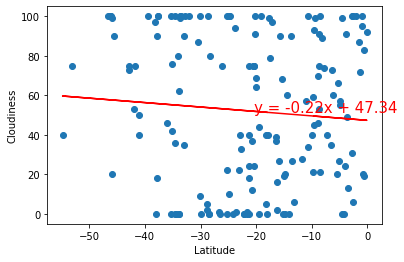

None


In [20]:

x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0712590097119445


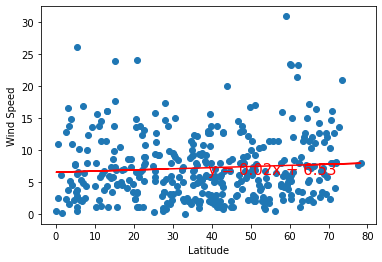

None


In [21]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15516570420784045


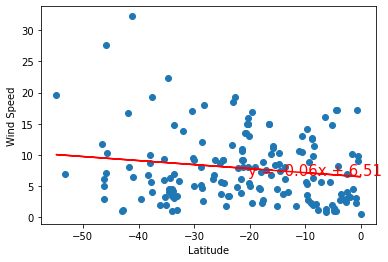

None


In [22]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))